In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1) / 255.0

In [10]:
model = models.Sequential([
    layers.Input(shape=(28,28,1)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)                      # logits (no softmax)
])

In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [6]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.8079 - loss: 0.5846
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9640 - loss: 0.1194
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9740 - loss: 0.0904
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9792 - loss: 0.0712
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9808 - loss: 0.0634


In [7]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9888 - loss: 0.0337


[0.027339300140738487, 0.991100013256073]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


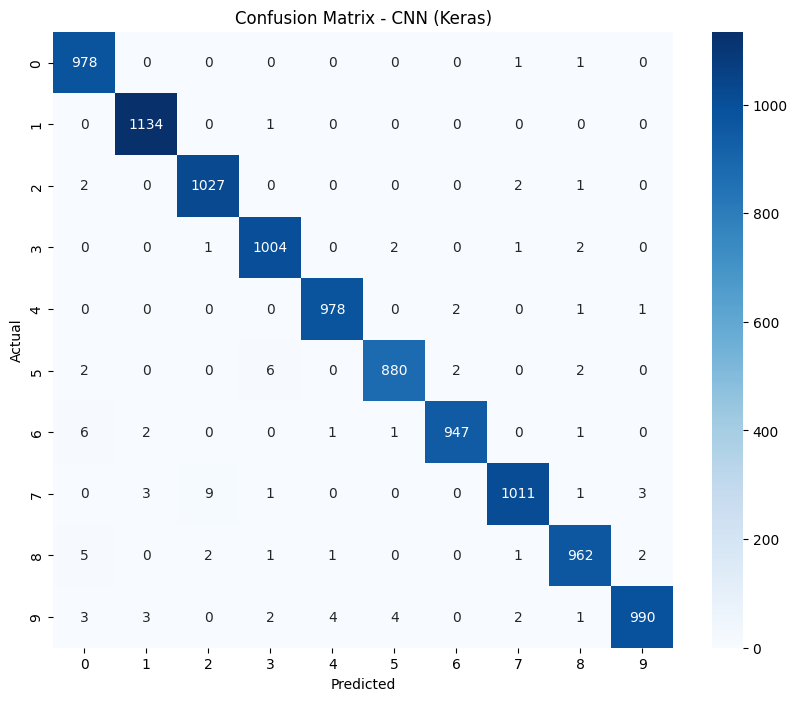

In [8]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN (Keras)")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


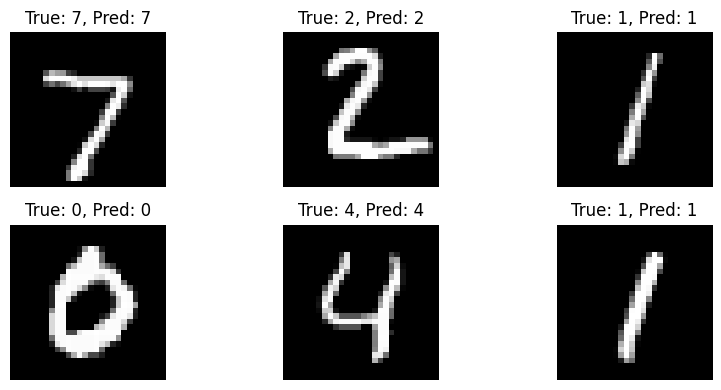

In [9]:
# Pick first 6 test images
sample_images = x_test[:6]
sample_labels = y_test[:6]

# Predict
predictions = model.predict(sample_images)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(9,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample_images[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {sample_labels[i]}, Pred: {pred_classes[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()